<a href="https://colab.research.google.com/github/D4-6L17CH-01/doko_syscafe/blob/master/fisica_electromagnetismo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import cv2
import requests

url = "https://cloudfront-eu-central-1.images.arcpublishing.com/prisaradiolos40/CQKLZKC5BZNOFESHIDJRICYS4Q.jpg"

In [63]:
# Función para obtener la imagen a partir de una URL
def get_image_from_url(url):
    # Descarga la imagen
    response = requests.get(url)

    # Convierte la respuesta a un array de bytes
    image_bytes = response.content

    # Decodifica la imagen a partir de los bytes
    image = cv2.imdecode(np.frombuffer(image_bytes, np.uint8), cv2.IMREAD_COLOR)

    # Retorna la imagen
    return image

# Función para calcular el gradiente de una imagen usando el algoritmo de Sobel
def sobel_gradient(image):
    # Convierte la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calcula el gradiente en la dirección X
    gx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0)

    # Calcula el gradiente en la dirección Y
    gy = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1)

    # Calcula la magnitud del gradiente
    magnitude = np.sqrt(gx**2 + gy**2)

    # Normaliza la magnitud del gradiente
    normalized_magnitude = magnitude / np.max(magnitude)

    # Retorna el gradiente en las direcciones X e Y y la magnitud del gradiente
    return gx, gy, normalized_magnitude

# Función para calcular el rotacional de una imagen
def curl(gx, gy):
    # Calcula el rotacional
    curl_image = np.zeros_like(gx)

    # Recorre la imagen por filas y columnas
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            # Calcula el rotacional en el píxel actual
            curl_image[i, j] = (gy[i + 1, j] - gy[i - 1, j]) - (gx[i, j + 1] - gx[i, j - 1])

    # Retorna la imagen del rotacional
    return curl_image

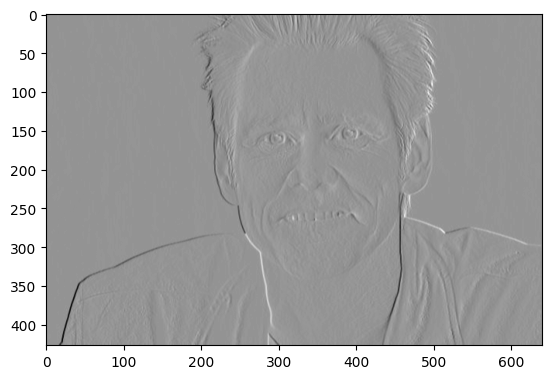

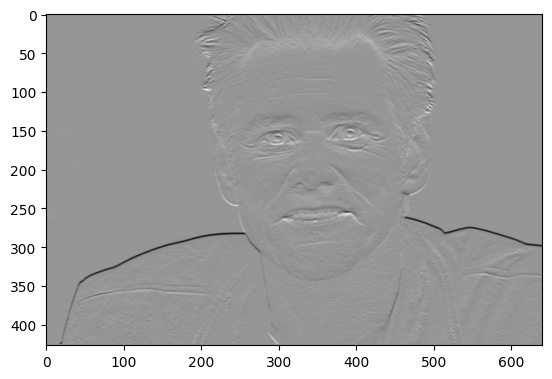

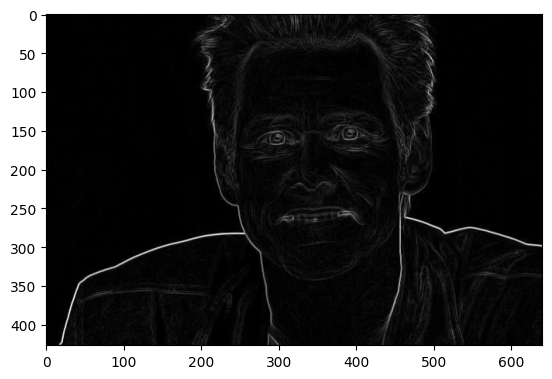

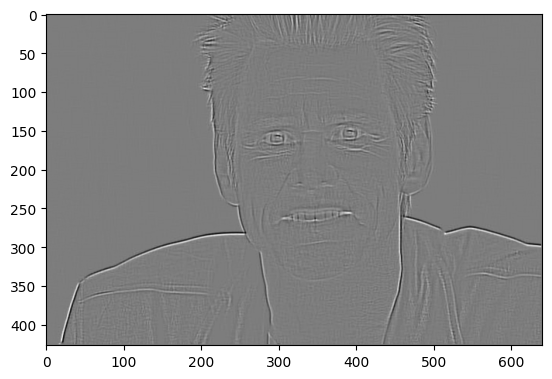

In [64]:
# URL de la imagen
#url = "https://www.ejemplo.com/imagen.jpg"

# Obtiene la imagen a partir de la URL
image = get_image_from_url(url)

# Calcula el gradiente de la imagen
gx, gy, magnitude = sobel_gradient(image)

# Visualiza el gradiente en la dirección X
plt.imshow(gx, cmap="gray")
plt.show()

# Visualiza el gradiente en la dirección Y
plt.imshow(gy, cmap="gray")
plt.show()

# Visualiza la magnitud del gradiente
plt.imshow(magnitude, cmap="gray")
plt.show()


# Calcula el rotacional de la imagen
curl_image = curl(gx, gy)

# Visualiza la imagen del rotacional
plt.imshow(curl_image, cmap="gray")
plt.show()



error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
